Text(0.5, 1.0, 'plot of u_h and u_*')

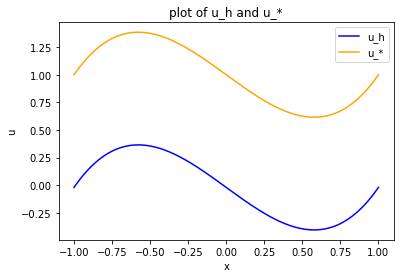

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, eye, kron, csr_matrix
from scipy.sparse.linalg import spsolve

def f(x):
    return x**3 - x + 1

def D1f( x ):
    return 3 * (x**2) - 1

def D2f( x ):
    return 6 * x

h = 1/99  # step size
N = 197

main_diag  = -2 * np.ones( N+2 )
main_diag[0]  = -1
main_diag[-1] = -1
upper_diag = np.ones( N+1 )
lower_diag = np.ones( N+1 )

L_h = diags([main_diag,upper_diag,lower_diag],[0,-1,1])
L_h = - L_h / h**2 

R_h = np.linspace(-1,1,N+2)
f_h = [ -D2f(i) for i in R_h]
f_h[0] = -D2f(-1)/2 - D1f(-1)/h
f_h[-1]= -D2f(1)/2  +  D1f(1)/h

u_h = spsolve(csr_matrix(L_h),f_h)
plt.plot(R_h,u_h,color='blue',label='u_h')
plt.plot(R_h,f(R_h),color='orange',label='u_*')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('plot of u_h and u_*')